# Credit Card users churn prediction

## Context

Thera bank recently saw a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.<br>

Customers’ leaving credit card services would lead banks to loss, so the bank wants to analyse the data of customers and identify the customers who will leave their credit card services and reason for the same – so that the bank could improve upon those areas.<br>

The aim is to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.<br>

## Objective

 - Explore and visualise the dataset.<br>
 - Build a classification model to predict if the customer is going to churn or not.<br>
 - Optimise the model using appropriate techniques.<br>
 - Generate a set of insights and recommendations that will help the bank.<br>

## Data Dictionary

 - __CLIENTNUM:__ Client number. Unique identifier for the customer holding the account<br>
 - __Attrition_Flag:__ Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"<br>
 - __Customer_Age:__ Age in Years<br>
 - __Gender:__ Gender of the account holder<br>
 - __Dependent_count:__ Number of dependents<br>
 - __Education_Level:__  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate<br>
 - __Marital_Status:__ Marital Status of the account holder<br>
 - __Income_Category:__ Annual Income Category of the account holder<br>
 - __Card_Category:__ Type of Card<br>
 - __Months_on_book:__ Period of relationship with the bank<br>
 - __Total_Relationship_Count:__ Total no. of products held by the customer<br>
 - __Months_Inactive_12_mon:__ No. of months inactive in the last 12 months<br>
 - __Contacts_Count_12_mon:__ No. of Contacts between the customer and bank in the last 12 months<br>
 - __Credit_Limit:__ Credit Limit on the Credit Card<br>
 - __Total_Revolving_Bal:__ The balance that carries over from one month to the next is the revolving balance<br>
 - __Avg_Open_To_Buy:__ Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)<br>
 - __Total_Trans_Amt:__ Total Transaction Amount (Last 12 months)<br>
 - __Total_Trans_Ct:__ Total Transaction Count (Last 12 months)<br>
 - __Total_Ct_Chng_Q4_Q1:__ Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter<br>
 - __Total_Amt_Chng_Q4_Q1:__ Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter<br>
 - __Avg_Utilization_Ratio:__ Represents how much of the available credit the customer spent<br>

## Importing Important libraries

In [272]:
import pandas as pd
import numpy as np
from numpy import array

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# to build decision tree
from sklearn.tree import DecisionTreeClassifier

# To build a bagging and boosting
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# to perform one hot encoding
from sklearn.preprocessing import OneHotEncoder

# to evaluate the models importing these metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To perform regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline and make_pipeline
#from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline

# to use standard scaler
from sklearn.preprocessing import StandardScaler

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading and Exploring dataset

In [273]:
df = pd.read_csv('BankChurners.csv')
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])) # prints the number of rows and columns of dataset

The dataset has 10127 rows and 21 columns


In [274]:
# using random to display random rows rather than only first 5 and last 5
np.random.seed(1)
df.sample(n=10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,...,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,...,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,...,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,...,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,...,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,...,1,2,34516.0,2488,32028.0,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,...,3,2,1625.0,0,1625.0,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,...,2,4,5535.0,1276,4259.0,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,...,3,3,25824.0,1170,24654.0,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,...,4,3,1970.0,1477,493.0,0.662,2493,44,0.571,0.750


In [275]:
df.info() # Function to display the shape, missing values and datatypes of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

 - We can see that educaional_level and maital_status column have null values.<br>
 - Some of the columns are of object data type.<br>

In [276]:
df.duplicated().sum() # function to check duplicate rows

0

There are no duplicate rows in the dataset.

Since the client number column has all unique values and it will not be adding any value to our model, let us drop the column.

In [277]:
df = df.drop(['CLIENTNUM'], axis = 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [278]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


__Observations:__
 
 - The customers are in the age group of 26 to 73 with 46 to be an average age. 75% of the customers are within the age group of 52.<br>
 - Most of the customers have dependants but some do not have any dependants.<br>
 - We can see that on a minimum, customers use the credit card for about 13 months. But there are customers who have been using the credit card for a long time.<br>
 - Total_relationship_count ranges from 1 to 6.<br>
 - There are customers who were active throughout the year but some were not active for about 6 months.<br>
 - Number of times contact is maintained with the bank ranges from 0 to 6, which means some customers were not in contact with the bank at all.<br>
 - The card limit, revolving balance, balance remaining transaction amount are in different ranges.

In [279]:
df.isnull().sum() # function to check for null values

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

We can see that educaional_level and maital_status column have null values

Attrition_Flag is our dependant variable. It contains 2 values - "Attrited Customer" and "Existing Customer", let us encode it to 0 and 1 respectively.

In [280]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [281]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Attrited Customer','Existing Customer'],['0','1'])

In [282]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int')
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [283]:
data_init = df.copy()

## Univariate Analysis

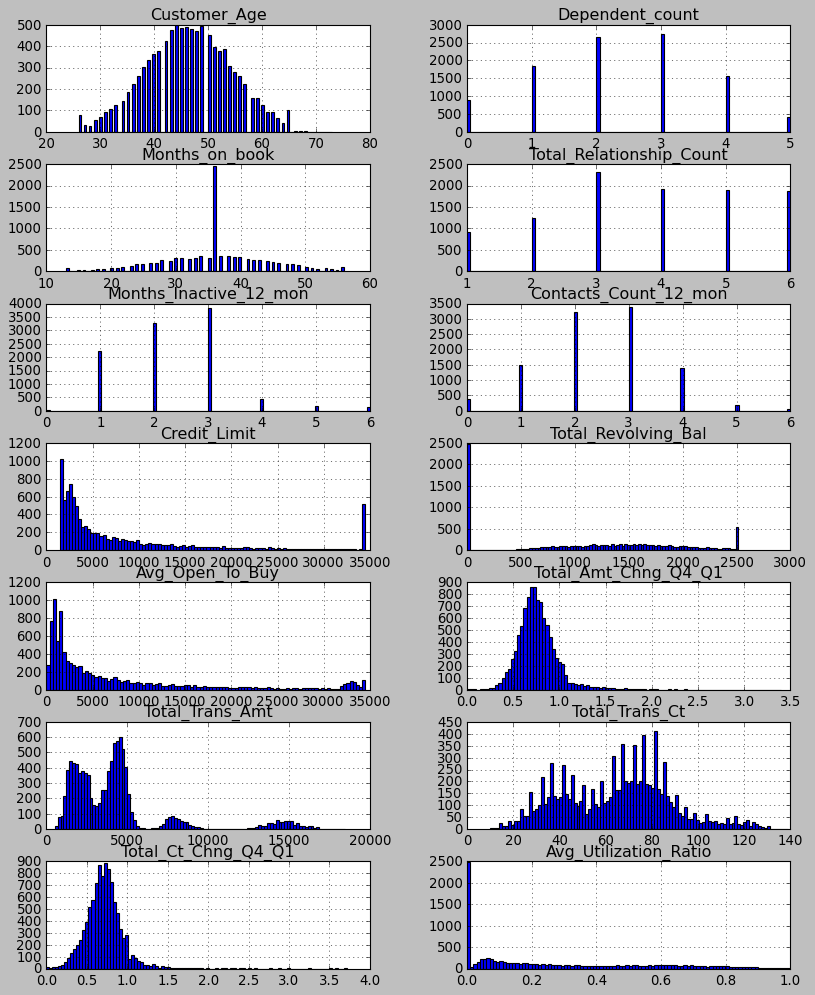

In [284]:
columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
           'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

__Observations:__

 - The customer age is fairly distributed with max to be between 40 and 55.<br>
 - Months_on_book shows that majority of customers have been using the credit card services for 36 months.<br>
 - Major customers were inactive for 3 months in a year.<br>
 - Credit card limit if right skewed with a drastic raise at 35000.<br>
 - AvG_open_to_buy is right skewed. <br>
 - Total_Trans_Amt is right skewed. <br>
 - Total_Ct_Chng_Q4_Q1 is right skewed. <br>
 - Majority of the customers have a total revolving balance to be 0. At the max the ba;ace is 2500. Few customers have revolving balance.<br>
 - Total_Amt_Chng_Q4_Q1 is right skewed. <br>
 - Total_Trans_Ct is right skewed. <br>
 - Avg_Utilization_Ratio is right skewed.<br>

#### Observations on Gender

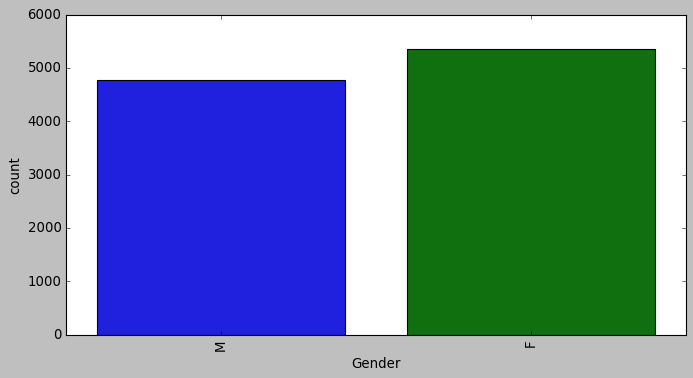

In [285]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - We can see that most of the customers are Female

#### Observations on Education_Level

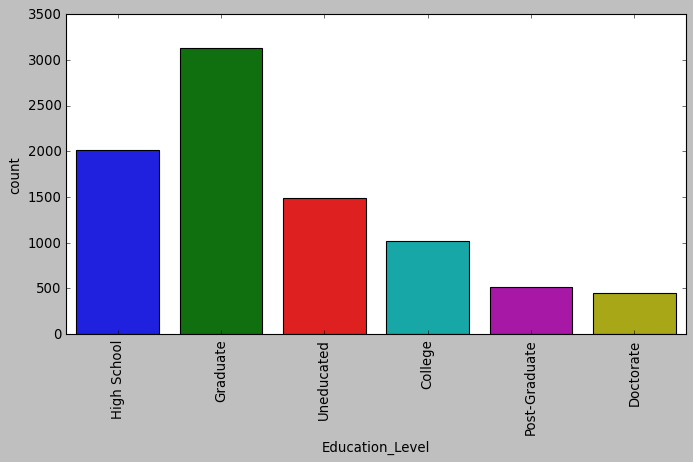

In [286]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Education_Level')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - We can see that majority of the customers are graduates.<br>
 - Customers with all educational backgrounds use these credit cards.

#### Observation on Marital_Status

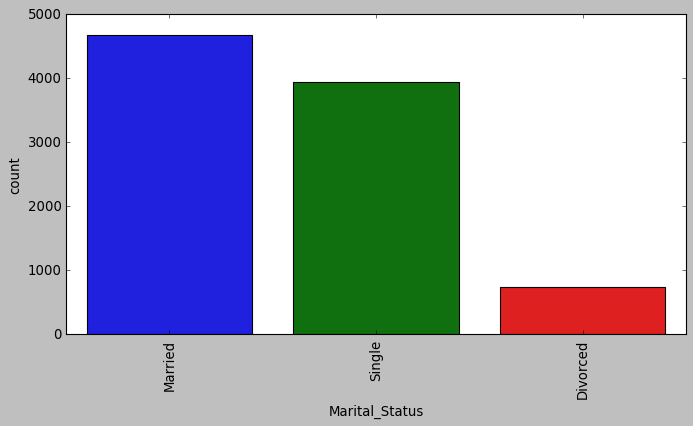

In [287]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Marital_Status')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - The majority of the customers are married.

#### Observation on Income_Category

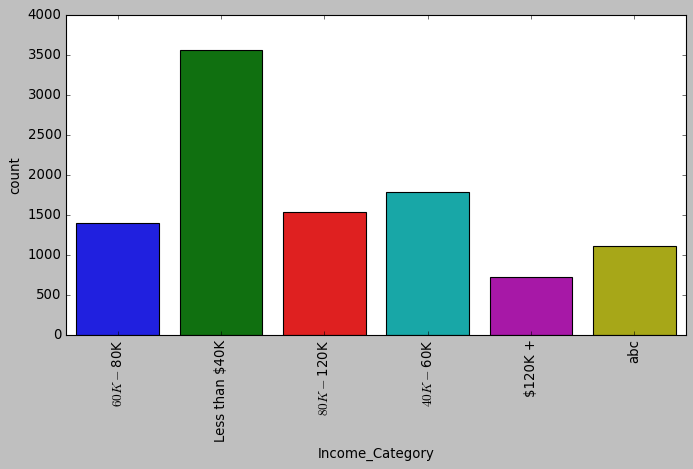

In [288]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Income_Category')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - Major customers have an income less that 40k dollars.<br>
 - There is a value abc which can either be a typing error or might be missing values and need to be replaced.

#### Observations on Card_Category

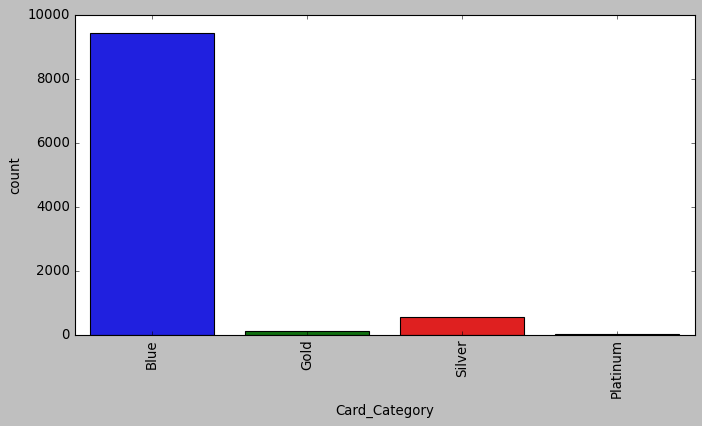

In [289]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Card_Category')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - Most of the customers are using blue card.<br>
 - There are very few customers using gold and platinum cards. These can be cards with premium features which are owned by customers having higher salaries.

## Bivariate Analysis

In [290]:
df.corr()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,-0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,-0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,-0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.000285,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


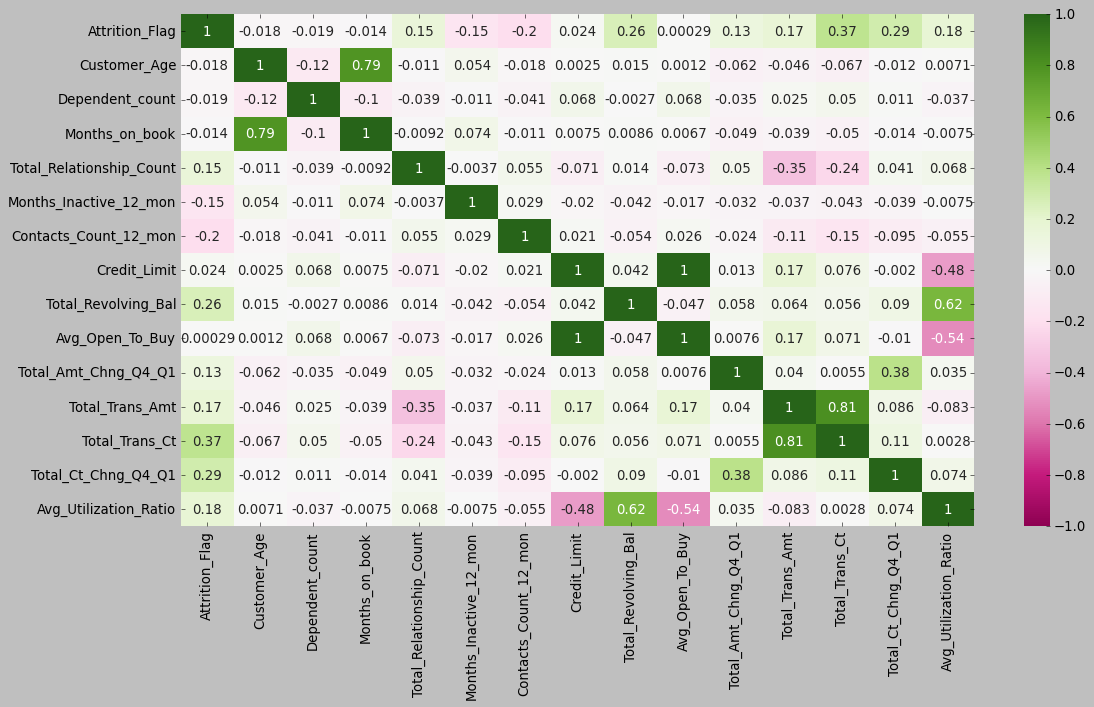

In [291]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="PiYG");

__Observations:__

 - Total transaction count and total transaction amount have highest positive correlation.<br>
 - Attrition flag have a positive correlation with total_relationship_count, total_revolving_balance, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio.<br>
 - Attrition flag have a negative correlation with months inactive and contact count.<br>
 - Customer age has a strong positive correlation with months_on_book.<br>
 - Total_reationship_ct has a negative correlation with total_trans_amt and total_trans_count.<br>
 - Contacts_ct also have a negative correlation with total_trans_amt and total_trans_count.<br>
 - Credit_limit has a negative correlation with avg_utilization_ratio.<br>
 - Total_revolving_bal have positive correlation with avg_utilization_ratio.<br>
 - Avg_open_to_buy has a negative correlation with avg_utilization_ratio.<br>
 - No other correlation can be depicted from the above graph.

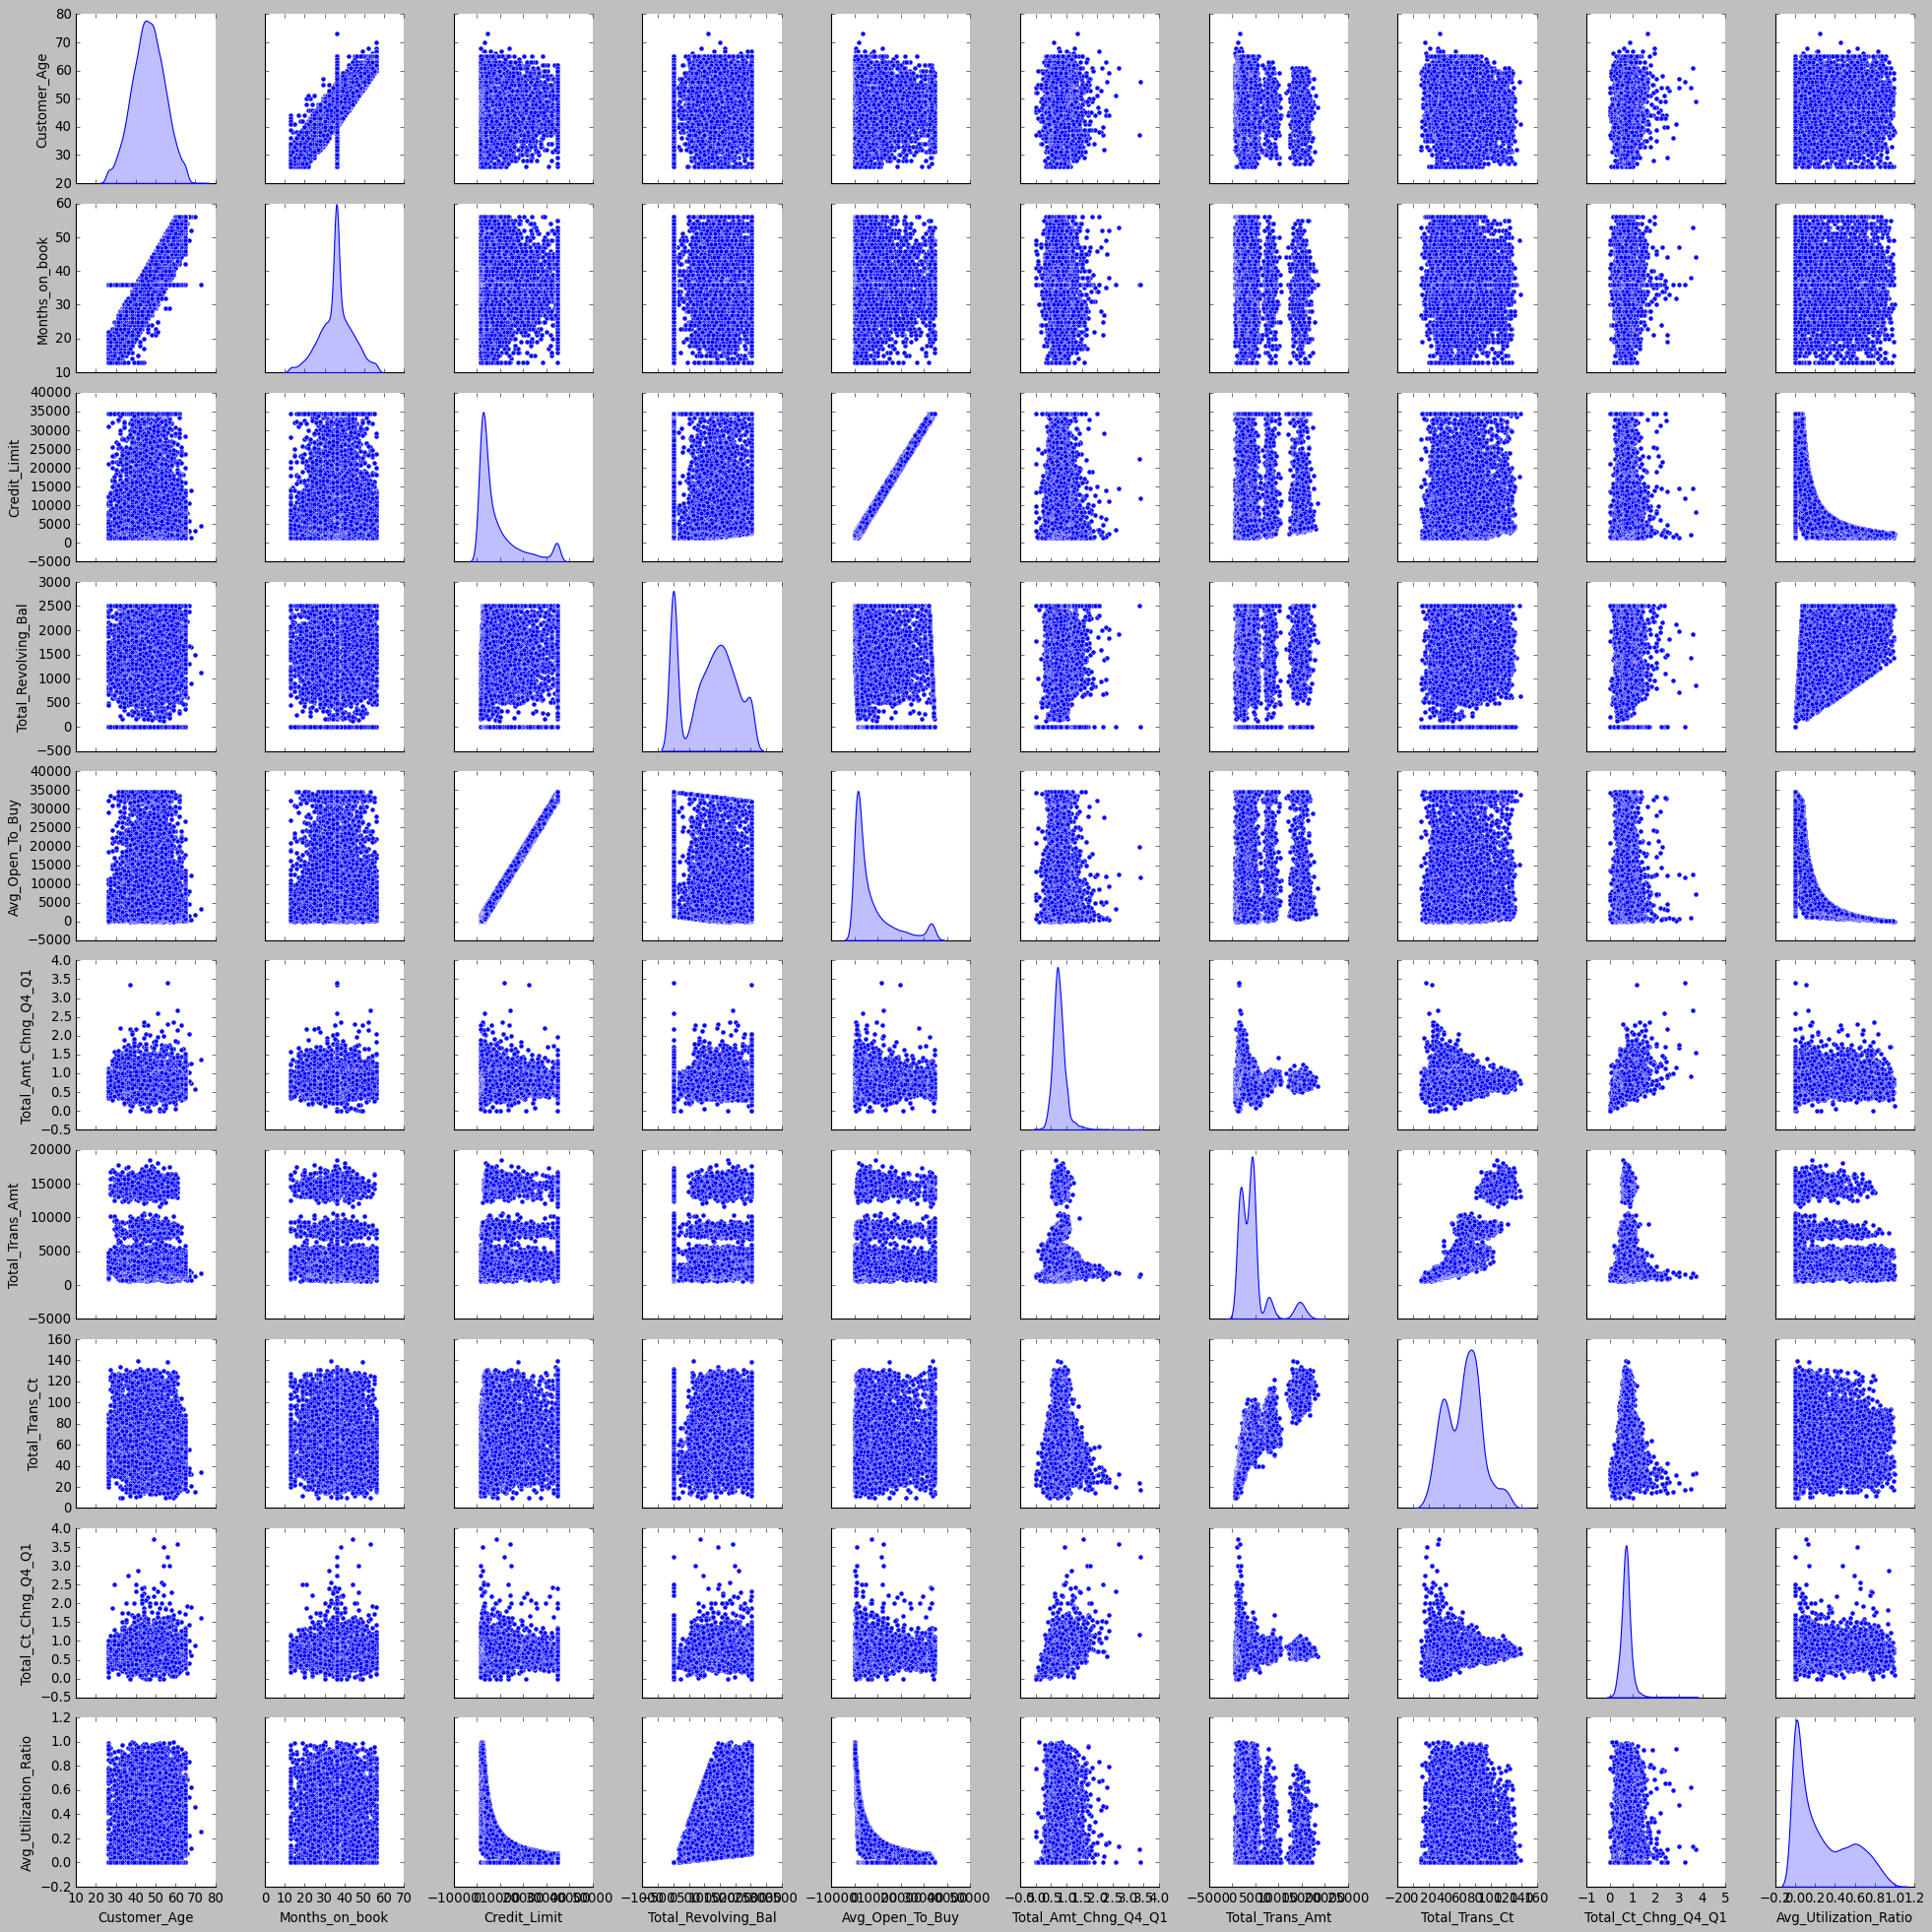

In [292]:
sns.pairplot(df,vars=['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                      'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'],
             diag_kind='kde');

__Observations:__
 
 - From the above graph we can see that credit limit have a positive correlation with avg_open_to_buy.<br>
 - Months_on_book and customer_age have a positive correlation.<br>
 - avg_utilization_ratio have a negative correlation with credit_limit and avg_open_to_buy.<br>
 - Relationship with the rest of the attributes cannot be determined.

## Missing Value Treatment

In [293]:
df.isnull().sum() 

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Education_level and marital_status have missing values.

#### Missing Value treatment for educational level

Let us replace the missing values with unknown

In [294]:
df.Education_Level = df.Education_Level.fillna('Unknown')

In [295]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

#### Missing Value treatment for marital status

Let us replace the missing values with unknown

In [296]:
df.Marital_Status = df.Marital_Status.fillna('Unknown')

In [297]:
df.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [298]:
df.isnull().sum() 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

We have treated the columns containing null values

## Outlier detection and treatment

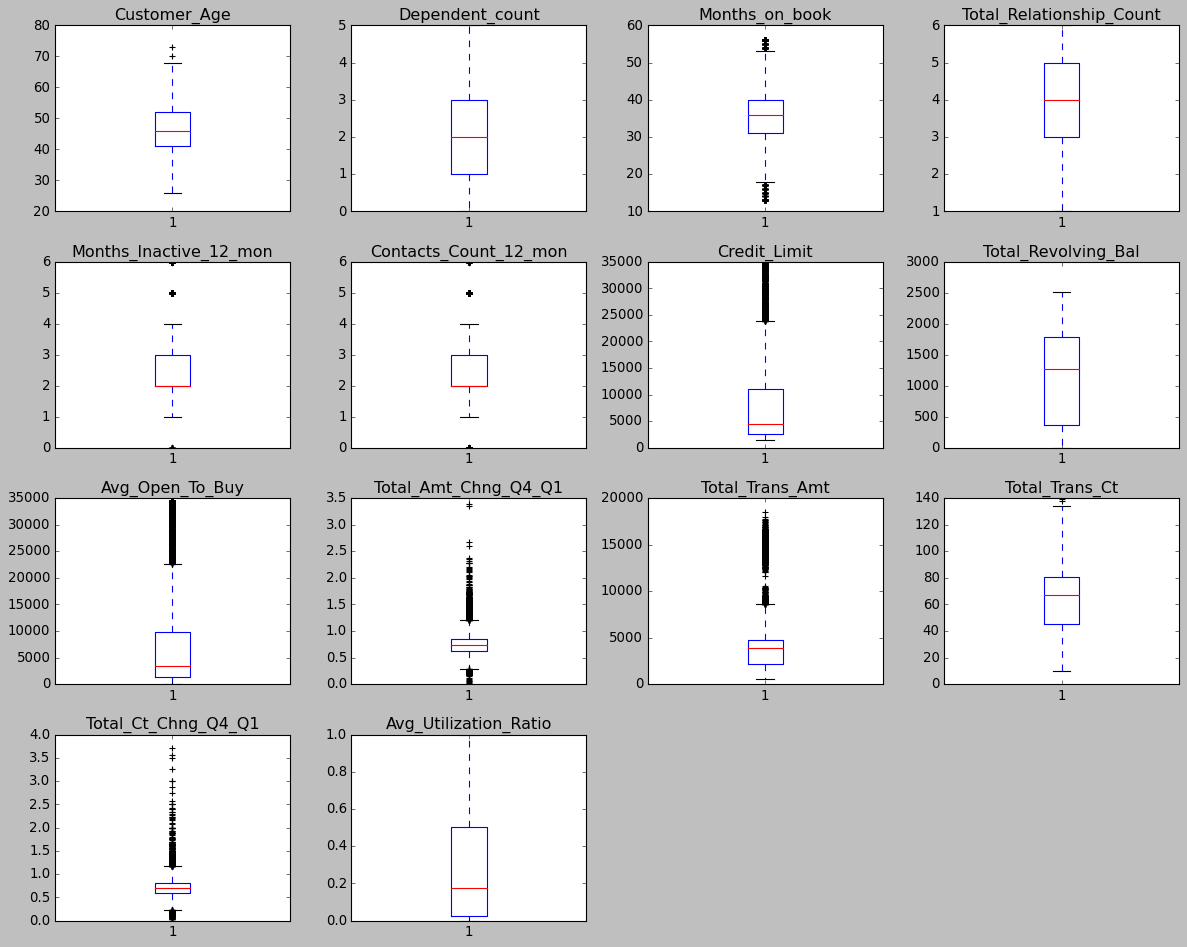

In [299]:
 # list of numerical values in the dataset
columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
           'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

plt.figure(figsize=(15,12)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(4,4, i + 1) # specify where to place each plot
    plt.boxplot(df[variable], whis=1.5) # create boxplot
    plt.tight_layout() # used to adjust the subplots
    plt.title(variable) # set the title to be the column name of that particular plot

plt.show()

#### Calculate the outliers in each column

In [300]:
Q1 = df[columns].quantile(0.25) # first quantile -> 25% percentile
Q3 = df[columns].quantile(0.75) # second quantile -> 75% percentile

IQR = Q3 - Q1 # Inter quantile range                  

lower_whisker = Q1 - 1.5*IQR # finding the lower bound   
upper_whisker = Q3 + 1.5*IQR # finding the upper bound

# find the percentage of outliers in each column
((df[columns] < lower_whisker) | (df[columns] > upper_whisker)).sum()/df.shape[0]*100 

Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             9.509233
Total_Amt_Chng_Q4_Q1        3.910339
Total_Trans_Amt             8.847635
Total_Trans_Ct              0.019749
Total_Ct_Chng_Q4_Q1         3.890590
Avg_Utilization_Ratio       0.000000
dtype: float64

__Observations:__

 - Customer_age has outliers. This can be possible as there is no limit to the age where the customer can use a credit card.<br>
 - Months_on_book have outliers but there can be customers who have recently started using the card or customers who have been using the card for a longer period of time.<br>
 - Months_inactive_12_mon have outliers with values 0, 5 and 6 months which is possible.
 - Contacts_count_12_mon number of contacts can be more for few customers.<br>
 - Credit_limit can be as much as 35000 considering there are gold and platinum cards which have premium features and possibility of having higher credit limit.<br>
 - Since AVG_open_to_buy is directly proportional to credit_limit it can be same as credit_limit.<br>
 - Total_trasaction_amt can have these values as the credit_limit is 35000 and max value here is 20000 which is absolutely normal.<br>
 - Total_transaction_cnt can be 0 as there are customers who have been inactive and can be more as there might be customers who use credit cards extensively.<br>
 - Total_amt_chng_Q4_Q1 and Total_ct_chng_Q4_Q1 is the ratio of transaction between Q4 and Q1 which can vary for different customers.<br>
 - Since the outliers are mostly on the amount columns we will not be treating any of the outliers here. 

## Feature Engineering

### Log Transformation

'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1' and
'Avg_Utilization_Ratio' is quite skewed. Let us apply log transformations and check if we can reduce this skewness.

#### Log Transformation of Credit_limit

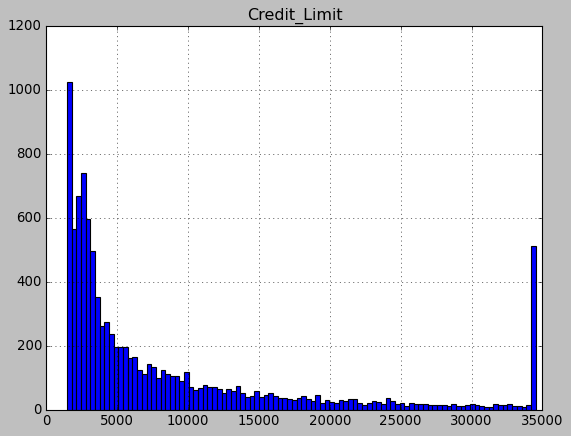

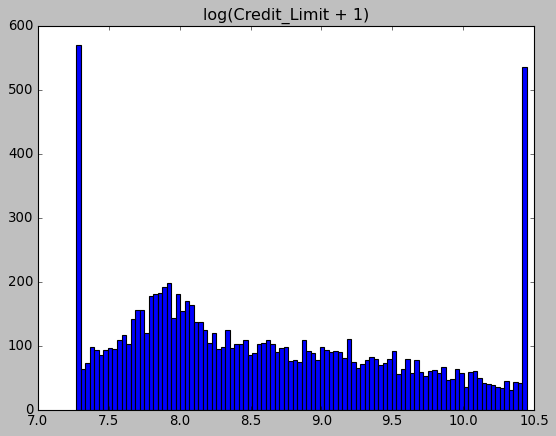

In [301]:
df['Credit_Limit'].hist(bins=100); 
plt.title('Credit_Limit')
plt.show()
plt.hist(np.log(df['Credit_Limit'] + 1), 100)
plt.title('log(Credit_Limit + 1)')
plt.show()

There is a reduction in skeweness. So let us create a new column with log values for credit_limit.

In [302]:
df["Credit_Limit_log"] = np.log(df["Credit_Limit"]+1)
df["Credit_Limit_log"].head()

0    9.448727
1    9.018817
2    8.137103
3    8.105911
4    8.458928
Name: Credit_Limit_log, dtype: float64

#### Log Transformation of Total_Revolving_Bal

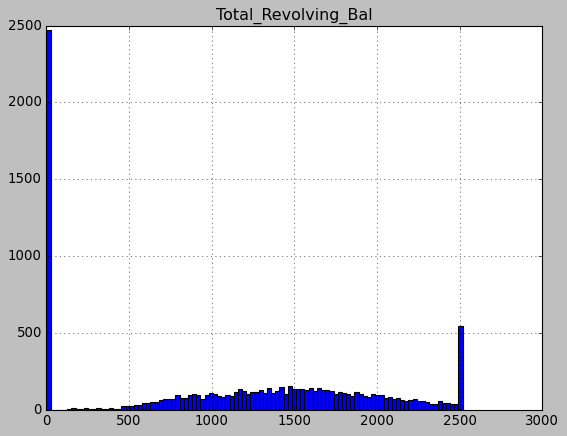

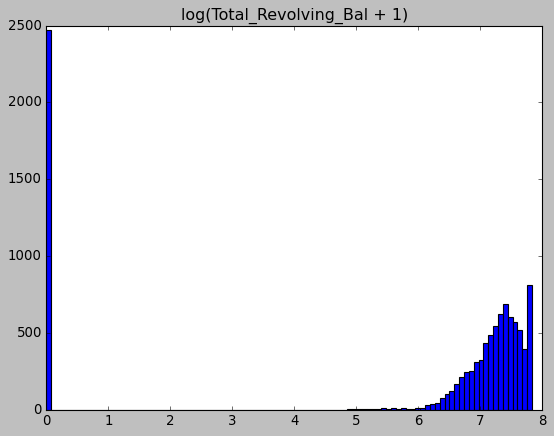

In [303]:
df['Total_Revolving_Bal'].hist(bins=100); 
plt.title('Total_Revolving_Bal')
plt.show()
plt.hist(np.log(df['Total_Revolving_Bal'] + 1), 100)
plt.title('log(Total_Revolving_Bal + 1)')
plt.show()

The data became left skewed after applying log trasformatio. So let us keep it as it is.

#### Log Transformation of Avg_Open_To_Buy

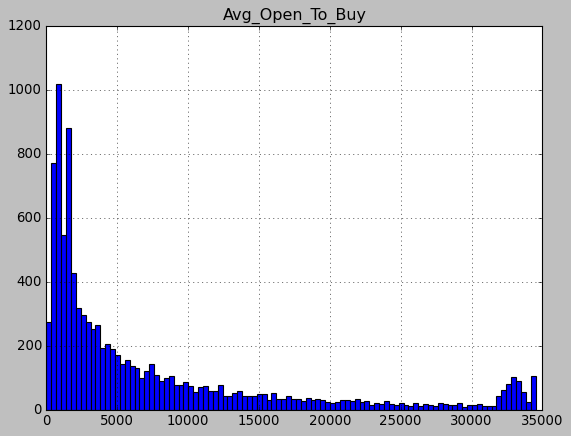

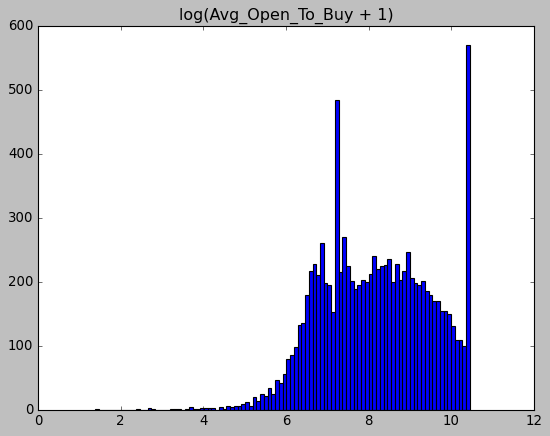

In [304]:
df['Avg_Open_To_Buy'].hist(bins=100); 
plt.title('Avg_Open_To_Buy')
plt.show()
plt.hist(np.log(df['Avg_Open_To_Buy'] + 1), 100)
plt.title('log(Avg_Open_To_Buy + 1)')
plt.show()

The graph looks better with log transformation. Let us add this as new column.

In [305]:
df["Avg_Open_To_Buy_log"] = np.log(df["Avg_Open_To_Buy"]+1)
df["Avg_Open_To_Buy_log"].head()

0    9.385553
1    8.908289
2    8.137103
3    6.680855
4    8.458928
Name: Avg_Open_To_Buy_log, dtype: float64

#### Log Transformation of Total_Amt_Chng_Q4_Q1

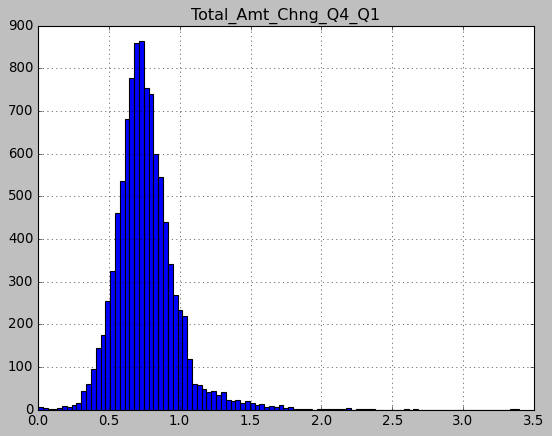

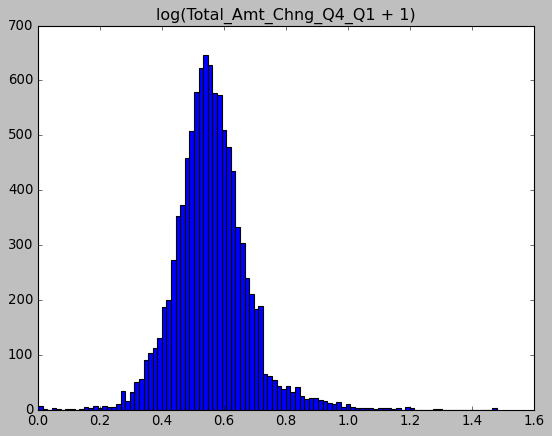

In [306]:
df['Total_Amt_Chng_Q4_Q1'].hist(bins=100); 
plt.title('Total_Amt_Chng_Q4_Q1')
plt.show()
plt.hist(np.log(df['Total_Amt_Chng_Q4_Q1'] + 1), 100)
plt.title('log(Total_Amt_Chng_Q4_Q1 + 1)')
plt.show()

There is no much difference here. So let this column be as it is.

#### Log Trasformation of Total_Trans_Amt

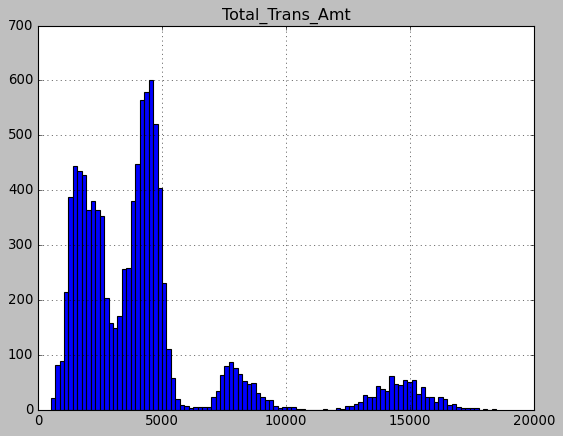

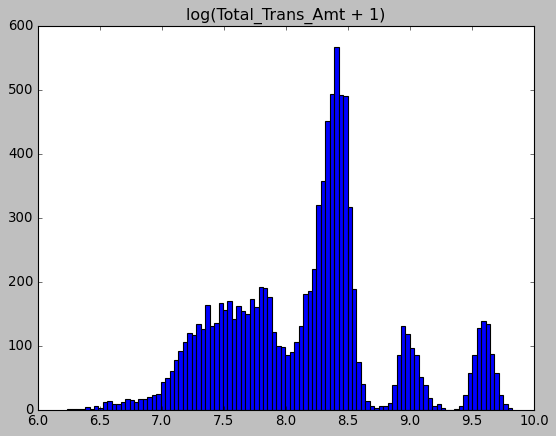

In [307]:
df['Total_Trans_Amt'].hist(bins=100); 
plt.title('Total_Trans_Amt')
plt.show()
plt.hist(np.log(df['Total_Trans_Amt'] + 1), 100)
plt.title('log(Total_Trans_Amt + 1)')
plt.show()

The graph looks better with log transformation. Let us add this as new column.

In [308]:
df["Total_Trans_Amt_log"] = np.log(df["Total_Trans_Amt"]+1)
df["Total_Trans_Amt_log"].head()

0    7.043160
1    7.163947
2    7.543273
3    7.066467
4    6.705639
Name: Total_Trans_Amt_log, dtype: float64

### Log Transformation of Total_Ct_Chng_Q4_Q1

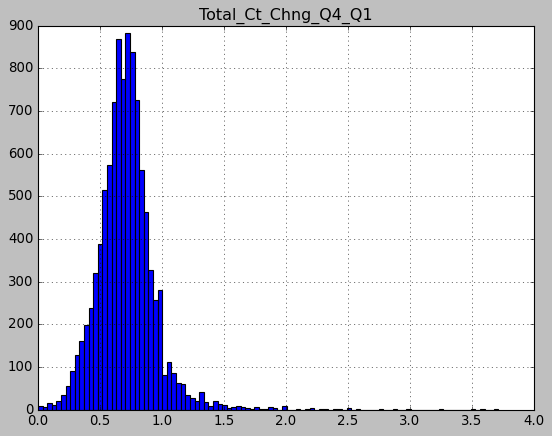

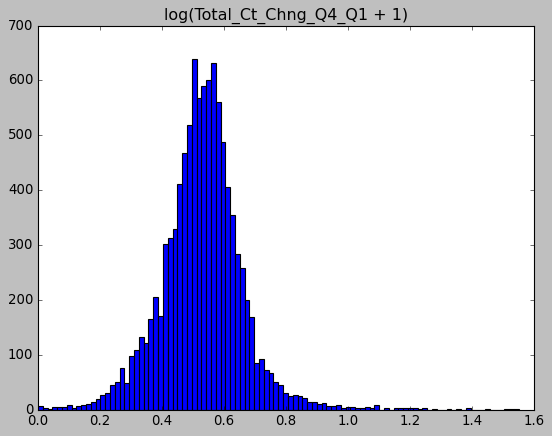

In [309]:
df['Total_Ct_Chng_Q4_Q1'].hist(bins=100); 
plt.title('Total_Ct_Chng_Q4_Q1')
plt.show()
plt.hist(np.log(df['Total_Ct_Chng_Q4_Q1'] + 1), 100)
plt.title('log(Total_Ct_Chng_Q4_Q1 + 1)')
plt.show()

There is no much difference here. So let this column be as it is.

#### Log Transformation of Avg_Utilization_Ratio

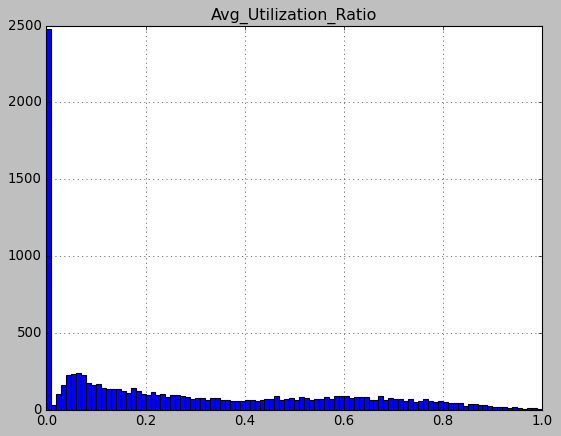

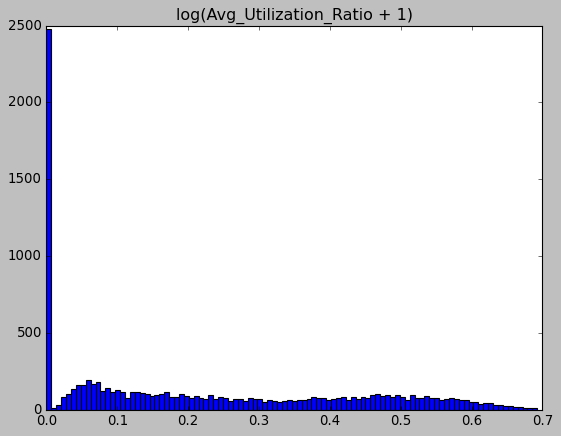

In [310]:
df['Avg_Utilization_Ratio'].hist(bins=100); 
plt.title('Avg_Utilization_Ratio')
plt.show()
plt.hist(np.log(df['Avg_Utilization_Ratio'] + 1), 100)
plt.title('log(Avg_Utilization_Ratio + 1)')
plt.show()

There is no much difference here. So let this column be as it is.

### One Hot Encoding

Let us convert the columns with object type to categorical type

In [311]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [312]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int32   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

Look at the unique values in the columns havig categorical datatype

In [314]:
for i in cols.columns:
    print('Unique values in',i, 'are :')
    print(cols[i].value_counts()) # print the number of unique values in a column
    print()
    print('*'*50+'\n')

Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64

**************************************************

Unique values in Education_Level are :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

**************************************************

Unique values in Marital_Status are :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

**************************************************

Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

**************************************************

Unique values in Card_Category are :
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dt

In the Income_category there is a value abc. Let us replace this value with unknown.

In [315]:
df['Income_Category'] = df['Income_Category'].replace(['abc'],['Unknown'])

In [316]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [317]:
replaceStruct = {
                "Income_Category":     {"Less than $40K": 1, "$40K - $60K": 2 ,"$60K - $80K": 3 ,"$80K - $120K": 4,
                                        "$120K +":5, "Unknown":-1}
}
df=df.replace(replaceStruct)

In [318]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Avg_Open_To_Buy_log,Total_Trans_Amt_log
0,1,45,M,3,High School,Married,3,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,9.448727,9.385553,7.043160
1,1,49,F,5,Graduate,Single,1,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,9.018817,8.908289,7.163947
2,1,51,M,3,Graduate,Married,4,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,8.137103,8.137103,7.543273
3,1,40,F,4,High School,Unknown,1,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,8.105911,6.680855,7.066467
4,1,40,M,3,Uneducated,Married,3,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,8.458928,8.458928,6.705639


In [319]:
df = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Card_Category'], drop_first=True)
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,3,39,5,1,3,12691.0,777,...,1,0,0,0,1,0,0,0,0,0
1,1,49,5,1,44,6,1,2,8256.0,864,...,0,0,0,0,0,1,0,0,0,0
2,1,51,3,4,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,40,4,1,34,3,4,1,3313.0,2517,...,1,0,0,0,0,0,1,0,0,0
4,1,40,3,3,21,5,1,0,4716.0,0,...,0,0,1,0,1,0,0,0,0,0


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10127 non-null  int32  
 1   Customer_Age                   10127 non-null  int64  
 2   Dependent_count                10127 non-null  int64  
 3   Income_Category                10127 non-null  int64  
 4   Months_on_book                 10127 non-null  int64  
 5   Total_Relationship_Count       10127 non-null  int64  
 6   Months_Inactive_12_mon         10127 non-null  int64  
 7   Contacts_Count_12_mon          10127 non-null  int64  
 8   Credit_Limit                   10127 non-null  float64
 9   Total_Revolving_Bal            10127 non-null  int64  
 10  Avg_Open_To_Buy                10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 12  Total_Trans_Amt                10127 non-null 

In [321]:
data = df.copy()

## Calculate the ratio of true or false in the outcome variable (Attrition_Flag)

In [322]:
n_true = len(df.loc[df['Attrition_Flag'] == 1])
n_false = len(df.loc[df['Attrition_Flag'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 8500 (83.93%)
Number of false cases: 1627 (16.07%)


We can see that attrited customers are 16% and existing customers are 83%. The outcome is imbalanced.

## Split the data

In [323]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [324]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 31) (1620, 31) (406, 31)


The data is split into Train set, Validation set and Test set in the ratio 60:20:20 respectively. 

## Let us built the functions to create confusion matrix for validation set, test set and to calculate metrics - accuracy, precision, recall and F1 score

In [325]:
## Function to create confusion matrix
def make_confusion_matrix_val(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_val)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [326]:
## Function to create confusion matrix
def make_confusion_matrix_test(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [327]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
#     pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
#     test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
#     test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
#     test_precision = metrics.precision_score(y_test,pred_test)
    
    #Precision of the model
#     train_f1 = metrics.f1_score(y_train,pred_train)
#     val_f1 = metrics.f1_score(y_val,pred_val)
#     test_f1 = metrics.f1_score(y_test,pred_test)
    
#     score_list.extend((train_acc,val_acc,test_acc,train_recall,val_recall,test_recall,train_precision,val_precision,
#                        test_precision,train_f1,val_f1,test_f1))
        
    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
#         print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
#         print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on validation set : ",metrics.precision_score(y_val,pred_val))
#         print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
#         print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
#         print("F1 on validation set : ",metrics.f1_score(y_val,pred_val))
#         print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Model Building

### Metric of Interest

__What does the bank want?__<br>

To minimise the losses. There are 2 types of losses here.<br>

 - The customer is offered a credit card but they stop using the credit card services.<br>
 - The customer will not leave the credit card services but bank thinks that the customer will leave the credit card services, and not offer a credit card.<br>
 
__Which loss is greater?__<br>
 
 Customer leaving the credit card services.<br>
 
__Since we do not want the customers to stop using the credit card, we will be using recall as the scoring metric.__<br>

 - Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives. 

### Logistic Regression

In [328]:
# Fit the model on train
log_model = LogisticRegression(solver="liblinear", random_state=1)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [329]:
log_model_score=get_metrics_score(log_model)

Accuracy on training set :  0.9060609801259104
Accuracy on validation set :  0.8950617283950617
Recall on training set :  0.9694072657743786
Recall on validation set :  0.9639705882352941
Precision on training set :  0.9225923852183651
Precision on validation set :  0.9155027932960894


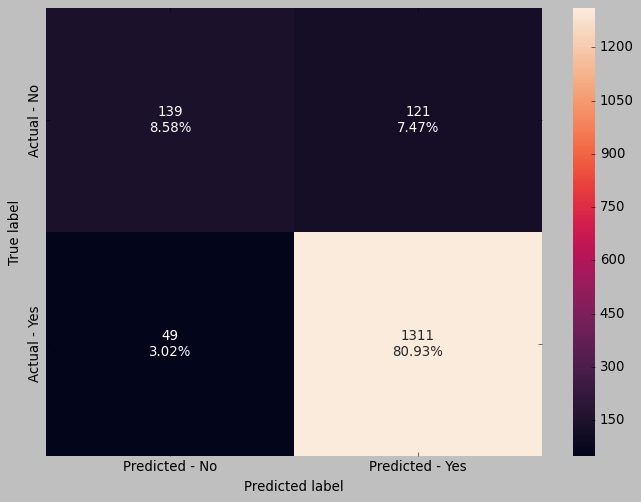

In [330]:
make_confusion_matrix_val(log_model,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1311 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 139 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 121 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 49 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Decision Tree

In [331]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [332]:
dtree_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on validation set :  0.9388888888888889
Recall on training set :  1.0
Recall on validation set :  0.9683823529411765
Precision on training set :  1.0
Precision on validation set :  0.9592134013109979


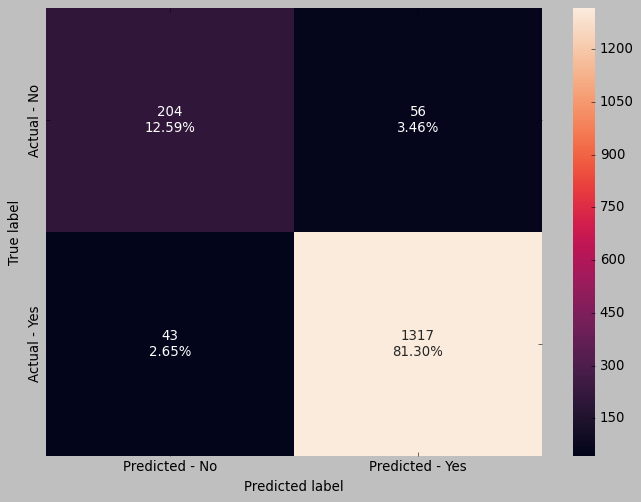

In [333]:
make_confusion_matrix_val(dTree,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1317 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 204 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 56 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 43 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Bagging Classifier

In [334]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [335]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9962967534872238
Accuracy on validation set :  0.9530864197530864
Recall on training set :  0.9969113104868363
Recall on validation set :  0.975735294117647
Precision on training set :  0.9986739354648593
Precision on validation set :  0.9686131386861314


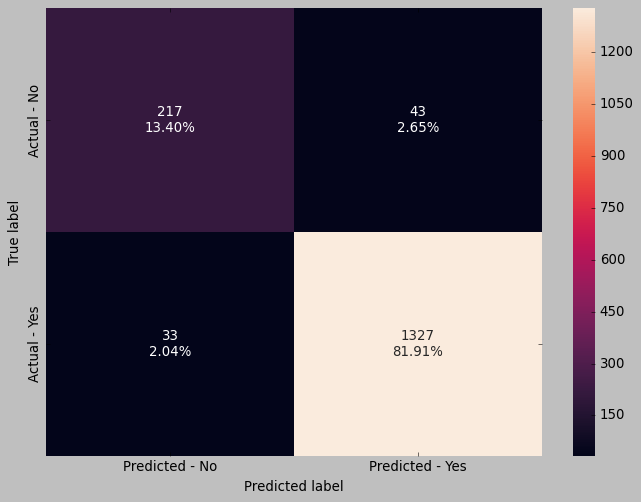

In [336]:
make_confusion_matrix_val(bagging_estimator,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1327 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 217 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 43 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 33 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Random Forest Classifier

In [337]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [338]:
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on validation set :  0.9635802469135802
Recall on training set :  1.0
Recall on validation set :  0.986764705882353
Precision on training set :  1.0
Precision on validation set :  0.970354302241504


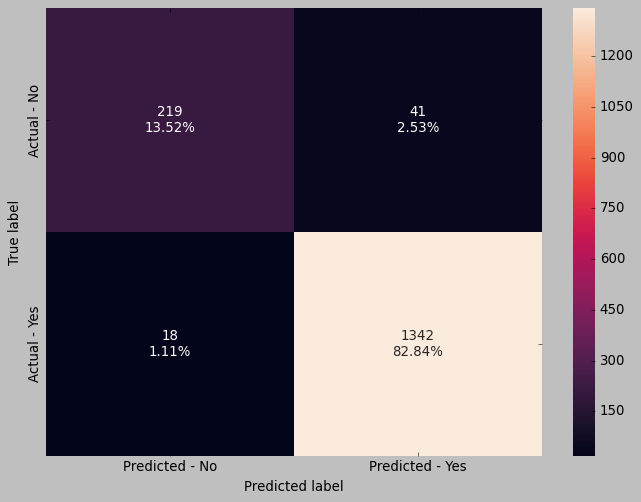

In [339]:
make_confusion_matrix_val(rf_estimator,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1342 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 219 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 41 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 18 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### AdaBoost Classifier

In [340]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [341]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.9624737686705345
Accuracy on validation set :  0.9518518518518518
Recall on training set :  0.9811737020150022
Recall on validation set :  0.9801470588235294
Precision on training set :  0.9742953118153936
Precision on validation set :  0.963150289017341


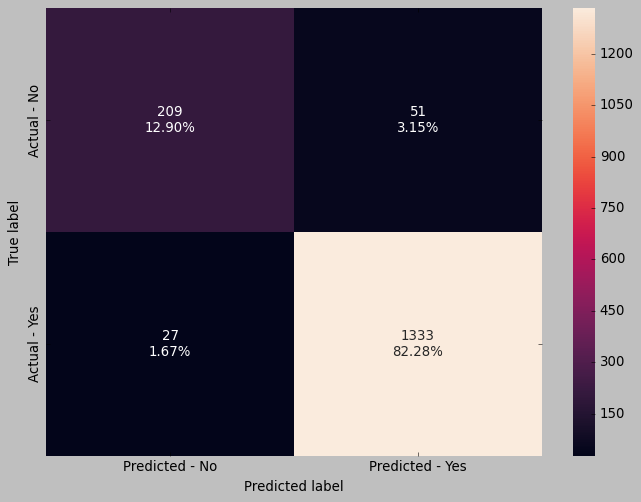

In [342]:
make_confusion_matrix_val(abc,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1333 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 209 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 51 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 27 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### GradientBoosting Classifier

In [343]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [344]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9743241575114183
Accuracy on validation set :  0.9648148148148148
Recall on training set :  0.9923518164435946
Recall on validation set :  0.9904411764705883
Precision on training set :  0.9774011299435028
Precision on validation set :  0.9683680805176133


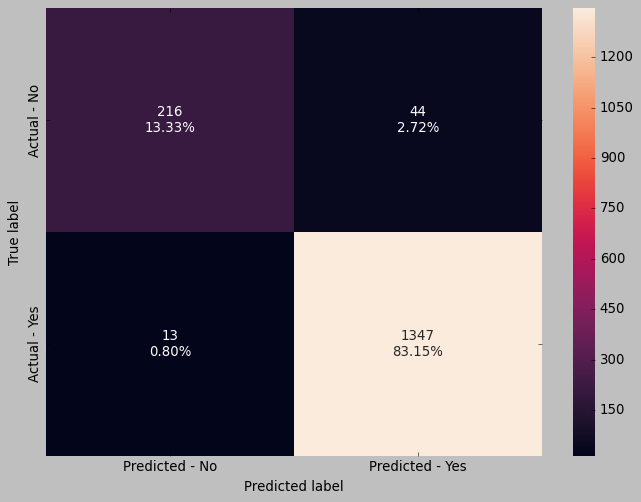

In [345]:
make_confusion_matrix_val(gbc,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1347 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 216 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 44 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 13 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

## Oversampling data

### Oversampling train data using SMOTE

In [346]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [347]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 6799
Before OverSampling, count of label '0': 1302 

After OverSampling, count of label '1': 6799
After OverSampling, count of label '0': 2719 

After OverSampling, the shape of train_X: (9518, 31)
After OverSampling, the shape of train_y: (9518,) 



### ### Now let us train the models using Oversampled data

### Logistic Regression on oversampled data

In [348]:
# Fit the model on train
log_model_over = LogisticRegression(solver="liblinear", random_state=1)
log_model_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1, solver='liblinear')

In [349]:
log_model_over_score=get_metrics_score(log_model_over)

Accuracy on training set :  0.890877669423528
Accuracy on validation set :  0.8864197530864197
Recall on training set :  0.9292543021032504
Recall on validation set :  0.9323529411764706
Precision on training set :  0.9400386847195358
Precision on validation set :  0.9323529411764706


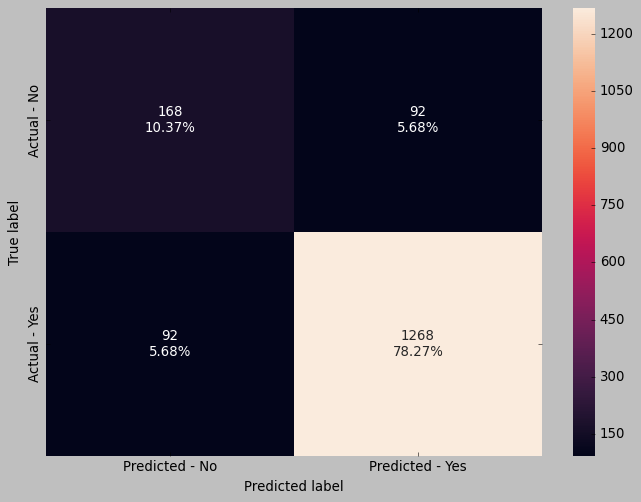

In [350]:
make_confusion_matrix_val(log_model_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1268 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 168 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 92 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 92 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Decision tree on oversampled data

In [351]:
dTree_over = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [352]:
dtree_over_score=get_metrics_score(dTree_over)

Accuracy on training set :  1.0
Accuracy on validation set :  0.9320987654320988
Recall on training set :  1.0
Recall on validation set :  0.9647058823529412
Precision on training set :  1.0
Precision on validation set :  0.9548762736535662


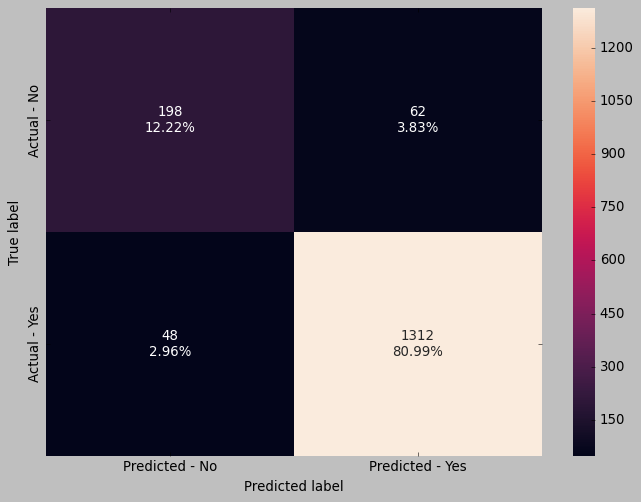

In [353]:
make_confusion_matrix_val(dTree_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1312 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 198 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 62 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 48 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Bagging Classifier on oversampled data

In [354]:
bagging_estimator_over=BaggingClassifier(random_state=1)
bagging_estimator_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [355]:
bagging_estimator_over_score=get_metrics_score(bagging_estimator_over)

Accuracy on training set :  0.9976546105419084
Accuracy on validation set :  0.9537037037037037
Recall on training set :  0.997793793204883
Recall on validation set :  0.9683823529411765
Precision on training set :  0.9994107248084856
Precision on validation set :  0.9762787249814677


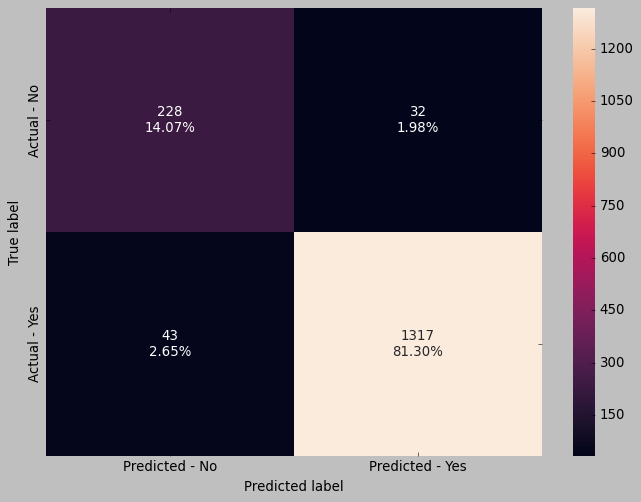

In [356]:
make_confusion_matrix_val(bagging_estimator_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1317 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 228 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 32 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 43 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Random Forest Classifier on oversampled data

In [357]:
rf_estimator_over=RandomForestClassifier(random_state=1)
rf_estimator_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [358]:
rf_estimator_over_score=get_metrics_score(rf_estimator_over)

Accuracy on training set :  1.0
Accuracy on validation set :  0.967283950617284
Recall on training set :  1.0
Recall on validation set :  0.9860294117647059
Precision on training set :  1.0
Precision on validation set :  0.9752727272727273


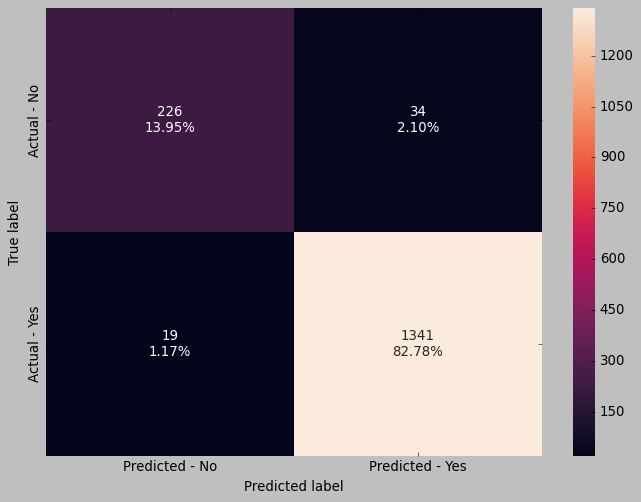

In [359]:
make_confusion_matrix_val(rf_estimator_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1341 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 226 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 34 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 19 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### AdaBoost Classifier on oversampled data

In [360]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [361]:
abc_over_score=get_metrics_score(abc_over)

Accuracy on training set :  0.9601283792124429
Accuracy on validation set :  0.9537037037037037
Recall on training set :  0.975584644800706
Recall on validation set :  0.9764705882352941
Precision on training set :  0.9768777614138439
Precision on validation set :  0.9686360320933625


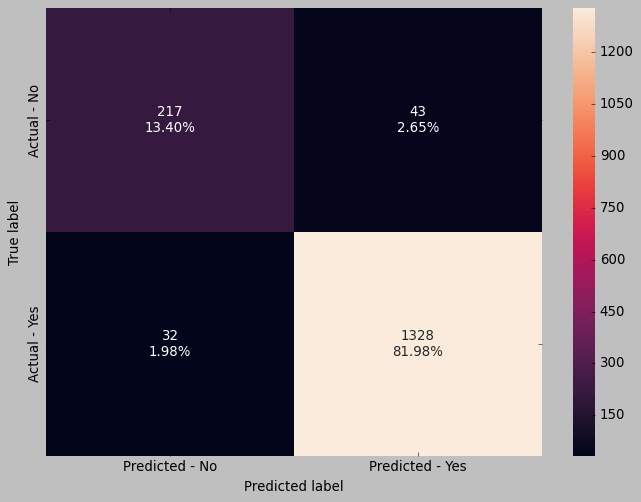

In [362]:
make_confusion_matrix_val(abc_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1328 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 217 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 43 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 32 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Gradient Boosting Classifier on oversampled data

In [363]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

In [364]:
gbc_over_score=get_metrics_score(gbc_over)

Accuracy on training set :  0.975558573015677
Accuracy on validation set :  0.9753086419753086
Recall on training set :  0.9858802765112517
Recall on validation set :  0.9904411764705883
Precision on training set :  0.9850110213078619
Precision on validation set :  0.980349344978166


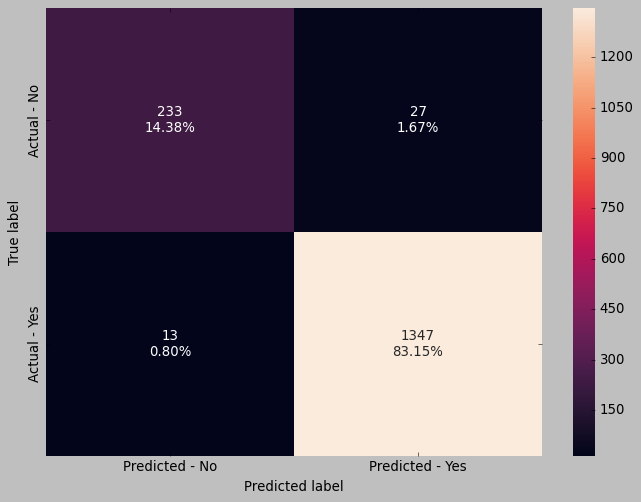

In [365]:
make_confusion_matrix_val(gbc_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1347 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 233 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 27 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 13 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

## Undersampling data

Let us undersample the data using Random Under Sampler

In [366]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [367]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 6799
Before Under Sampling, count of label '0': 1302 

After Under Sampling, count of label '1': 1302
After Under Sampling, count of label '0': 1302 

After Under Sampling, the shape of train_X: (2604, 31)
After Under Sampling, the shape of train_y: (2604,) 



### Now let us train the models using undersampled data

### Logistic Regression on undersampled data

In [368]:
# Fit the model on train
log_model_un = LogisticRegression(solver="liblinear", random_state=1)
log_model_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1, solver='liblinear')

In [369]:
log_model_un_score=get_metrics_score(log_model_un)

Accuracy on training set :  0.8559437106530058
Accuracy on validation set :  0.8530864197530864
Recall on training set :  0.8539491101632593
Recall on validation set :  0.850735294117647
Precision on training set :  0.9709030100334448
Precision on validation set :  0.9706375838926175


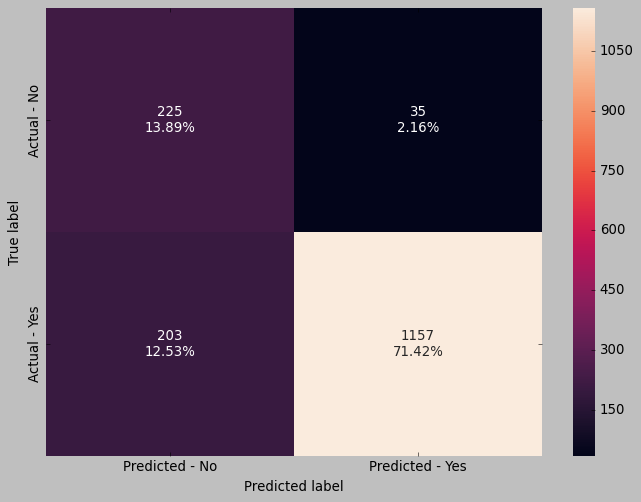

In [370]:
make_confusion_matrix_val(log_model_un,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1157 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 225 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 35 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 203 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Decision tree on undersampled data

In [371]:
dTree_un = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

In [372]:
dtree_un_score=get_metrics_score(dTree_un)

Accuracy on training set :  0.9406246142451549
Accuracy on validation set :  0.9049382716049382
Recall on training set :  0.9292543021032504
Recall on validation set :  0.9139705882352941
Precision on training set :  1.0
Precision on validation set :  0.97109375


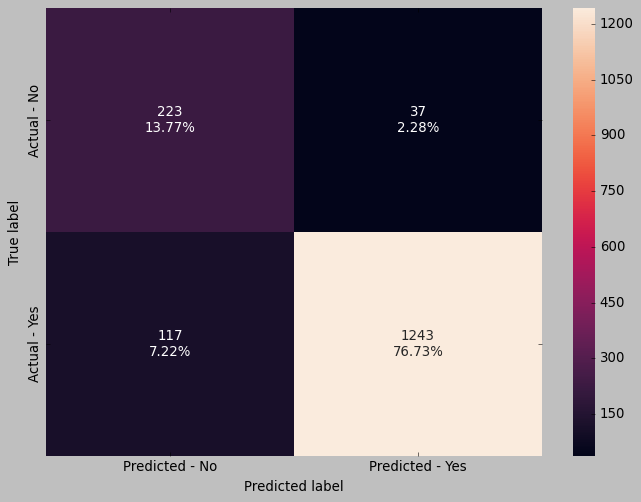

In [373]:
make_confusion_matrix_val(dTree_un,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1243 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 223 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 37 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 117 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Bagging Classifier on undersampled data

In [374]:
bagging_estimator_un=BaggingClassifier(random_state=1)
bagging_estimator_un.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

In [375]:
bagging_estimator_un_score=get_metrics_score(bagging_estimator_un)

Accuracy on training set :  0.9416121466485619
Accuracy on validation set :  0.9209876543209876
Recall on training set :  0.9307251066333284
Recall on validation set :  0.9198529411764705
Precision on training set :  0.9996840442338073
Precision on validation set :  0.9850393700787402


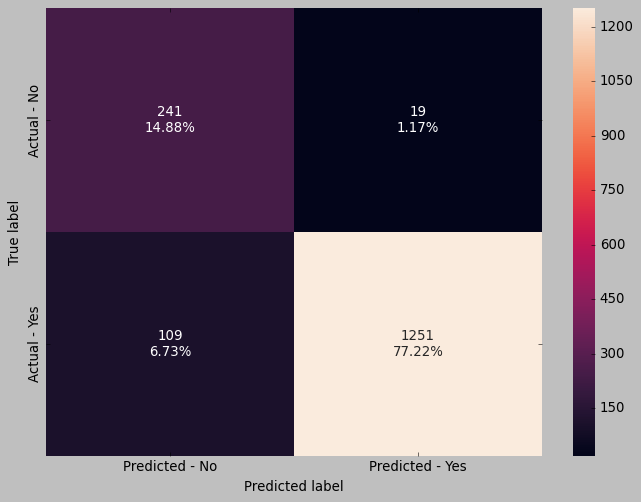

In [376]:
make_confusion_matrix_val(bagging_estimator_un,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1251 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 241 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 19 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 109 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Randon Forest Classifier on undersampled data

In [377]:
rf_estimator_un=RandomForestClassifier(random_state=1)
rf_estimator_un.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

In [378]:
rf_estimator_un_score=get_metrics_score(rf_estimator_un)

Accuracy on training set :  0.9597580545611653
Accuracy on validation set :  0.9419753086419753
Recall on training set :  0.9520517723194587
Recall on validation set :  0.9404411764705882
Precision on training set :  1.0
Precision on validation set :  0.989938080495356


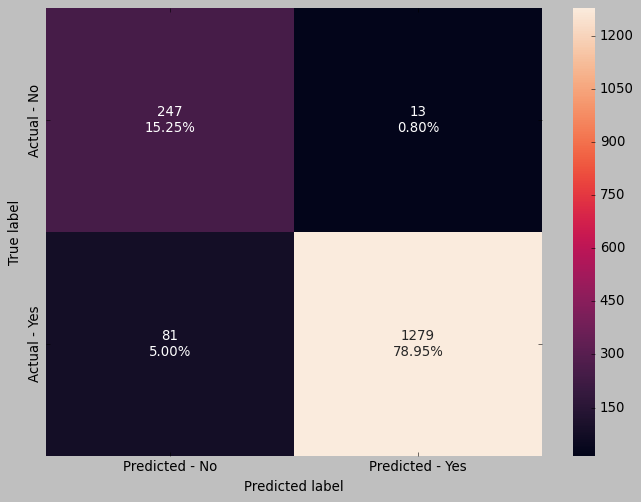

In [379]:
make_confusion_matrix_val(rf_estimator_un,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1251 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 241 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 19 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 109 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### AdaBoost Classifier on undersampled data

In [380]:
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

In [381]:
abc_un_score=get_metrics_score(abc_un)

Accuracy on training set :  0.9408714973460066
Accuracy on validation set :  0.9290123456790124
Recall on training set :  0.9376378879246948
Recall on validation set :  0.9316176470588236
Precision on training set :  0.9914463452566097
Precision on validation set :  0.9829325058184639


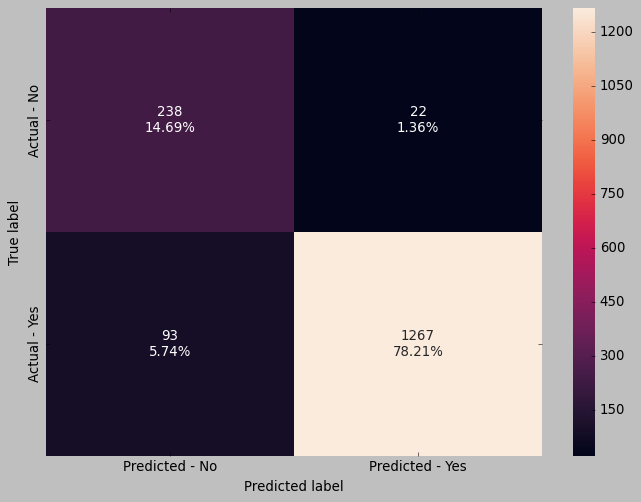

In [382]:
make_confusion_matrix_val(abc_un,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1267 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 238 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 22 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 93 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Gradient Boosting Classifier on undersampled data

In [383]:
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

In [384]:
gbc_un_score=get_metrics_score(gbc_un)

Accuracy on training set :  0.9535859770398716
Accuracy on validation set :  0.945679012345679
Recall on training set :  0.9480806000882482
Recall on validation set :  0.9455882352941176
Precision on training set :  0.9964445818519091
Precision on validation set :  0.9892307692307692


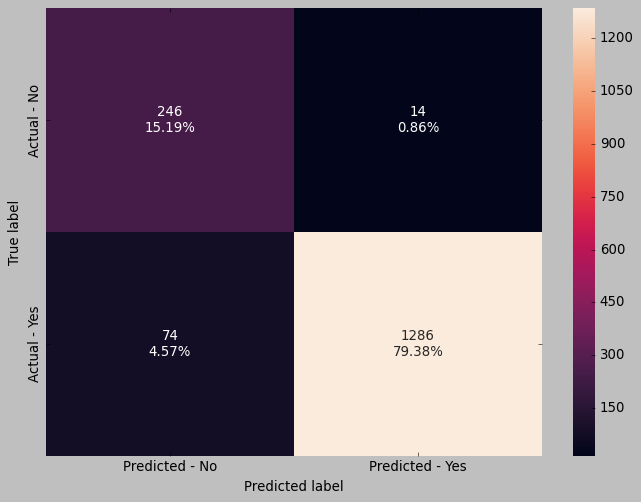

In [385]:
make_confusion_matrix_val(gbc_un,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1286 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 246 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 14 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 74 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

## Comparing the models

In [386]:
# defining list of models
models = [log_model, dTree, bagging_estimator, rf_estimator, abc, gbc, log_model_over, dTree_over, bagging_estimator_over,
          rf_estimator_over, abc_over, gbc_over, log_model_un, dTree_un, bagging_estimator_un, rf_estimator_un, abc_un, gbc_un]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []


# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))


In [387]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree', 'Bagging CLassifier', 
                                          'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier',
                                          'Logistic Regression with Oversampling','Decision Tree with Oversampling', 
                                          'Bagging CLassifier with Oversampling', 'Random Forest Classifier with Oversampling', 
                                          'AdaBoost Classifier with Oversampling', 
                                          'Gradient Boosting Classifier with Oversampling',
                                          'Logistic Regression with Undersampling','Decision Tree with Undersampling', 
                                          'Bagging CLassifier with Undersampling','Random Forest Classifier with Undersampling',
                                          'AdaBoost Classifier with Undersampling', 
                                          'Gradient Boosting Classifier with Undersampling'], 
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val}) 
comparison_frame

,Model,Train_Accuracy,Validation_Accuracy,Train_Recall,Validation_Recall,Train_Precision,Validation_Precision
0,Logistic Regression,0.91,0.90,0.97,0.96,0.92,0.92
1,Decision Tree,1.00,0.94,1.00,0.97,1.00,0.96
2,Bagging CLassifier,1.00,0.95,1.00,0.98,1.00,0.97
3,Random Forest Classifier,1.00,0.96,1.00,0.99,1.00,0.97
4,AdaBoost Classifier,0.96,0.95,0.98,0.98,0.97,0.96
5,Gradient Boosting Classifier,0.97,0.96,0.99,0.99,0.98,0.97
6,Logistic Regression with Oversampling,0.89,0.89,0.93,0.93,0.94,0.93
7,Decision Tree with Oversampling,1.00,0.93,1.00,0.96,1.00,0.95
8,Bagging CLassifier with Oversampling,1.00,0.95,1.00,0.97,1.00,0.98
9,Random Forest Classifier with Oversampling,1.00,0.97,1.00,0.99,1.00,0.98


#### Observations:

__Logistic Regression:__

 - The Recall of training set and validation set using logistic regression with original dataset seems to be close.<br>
 - The Recall after applying oversampling reduces when compared with the original dataset. But it is same for both train and validation set.<br>
 - After applying undersampling the recall has reduced drastically. This can be due to loss of information while undersampling.<br>
 
__Decision Tree:__
 
  - There is a slight difference in recall of train and validation set, the data might be overfitting.<br>
  - On oversampling the recall of validation set have further reduced.<br>
  - After undersampling the recall for both train and validation set have reduced.<br>
  
__Bagging CLassifier:__

 - There is a slight difference in recall of train and validation set, the data might be overfitting.<br>
 - On oversampling the recall of validation set have further reduced.<br>
 - After undersampling the recall for both train and validation set have reduced.<br>

__Random Forest Classifier:__

 - There is a very small difference in recall of train and validation set. The algorithm seems to be working perfectly for train set.<br>
 - The recall remains the same on oversampling.<br>
 - There is a reduction of recall for both train and validation set on undersampling.<br>

__AdaBoost Classifier:__

 - The Recall of both the train and validation set is the same. The model seems to be working well on the dataset.<<br>
 - There is no changes after oversampling.<br>
 - There is a reduction in the recall of both train set and validation set. There is a slight reduction in validation set compared to train set.<br>

__Gradient Boosting Classifier:__

 - The Recall of this model with the original dataset seems to be the highest when compared to all the other models.<br>
 - The Recall is same after oversampling.<br>
 - The Recall after undersampling has reduced a bit but still performing well on both train and validation set.<br>

__Let us consider AdaBoost Classifier on original dataset, Gradient Boosting Classifier on original dataset and Gradient Boosting classifier with oversampling to perform hyperparameter tuning as they are performing well when compared with all the other models and check if there is any increase in the performance.__

## Hyperparameter tuning using Randomised Search

### Tuning using AdaBoost Classifier on Original train dataset

In [388]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),
                      DecisionTreeClassifier(max_depth=3, random_state=1),DecisionTreeClassifier(max_depth=4, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
rand_obj_abc = RandomizedSearchCV(abc_tuned, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, 
                                  n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

rand_obj_abc = rand_obj_abc.fit(X_train, y_train)

# Print the best combination of parameters
rand_obj_abc.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_estimators': 50,
 'learning_rate': 0.1,
 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)}

__Let us check the best cv score__

In [389]:
rand_obj_abc.best_score_ # Best CV score 

0.988085962861966

In [390]:
abc_estimator_tuned__score=get_metrics_score(rand_obj_abc)

Accuracy on training set :  0.9913222532725401
Accuracy on validation set :  0.9933823529411765
Recall on training set :  0.9913222532725401
Recall on validation set :  0.9933823529411765
Precision on training set :  0.9483607710707753
Precision on validation set :  0.9394993045897079


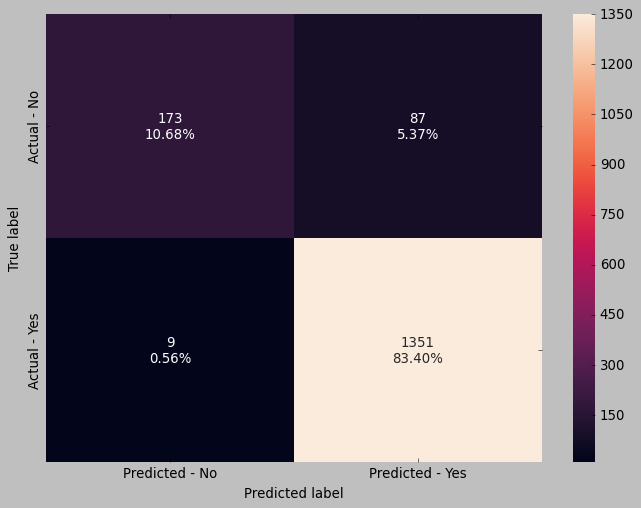

In [391]:
make_confusion_matrix_val(rand_obj_abc,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1351 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 173 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 87 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 9 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

__The Recall had increased by 1% after tuning.__

### Tuning using Gradient Boosting Classifier on Original train dataset

In [392]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
rand_obj_gbc = RandomizedSearchCV(gbc_tuned, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, 
                                  n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

rand_obj_gbc = rand_obj_gbc.fit(X_train, y_train)

# Print the best combination of parameters
rand_obj_gbc.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'subsample': 1, 'n_estimators': 100, 'max_features': 1}

__Let us check the best cv score__

In [393]:
rand_obj_gbc.best_score_ # Best CV score 

0.9922044756092283

In [394]:
gbc_estimator_tuned__score=get_metrics_score(rand_obj_gbc)

Accuracy on training set :  0.994263862332696
Accuracy on validation set :  0.9911764705882353
Recall on training set :  0.994263862332696
Recall on validation set :  0.9911764705882353
Precision on training set :  0.9237496583766056
Precision on validation set :  0.9132791327913279


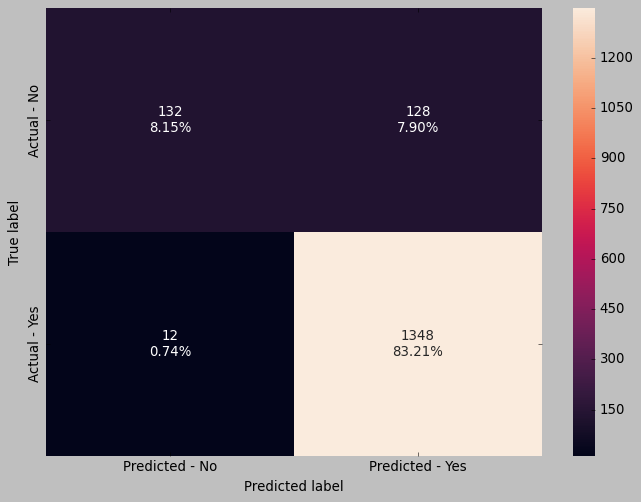

In [395]:
make_confusion_matrix_val(rand_obj_gbc,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1348 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 132 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 128 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 12 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

__There is no change in the recall when compared to the original model__

### Tuning using Gradient Boosting Classifier on Oversampled train dataset

In [396]:
# Choose the type of classifier. 
gbc_tuned_over = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
rand_obj_gbc_over = RandomizedSearchCV(gbc_tuned_over, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, 
                                  n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

rand_obj_gbc_over = rand_obj_gbc_over.fit(X_train_over, y_train_over)

# Print the best combination of parameters
rand_obj_gbc_over.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'subsample': 0.8, 'n_estimators': 250, 'max_features': 0.9}

__Let us check the best cv score__

In [397]:
rand_obj_gbc.best_score_ # Best CV score 

0.9922044756092283

In [398]:
gbc_estimator_tuned_over_score=get_metrics_score(rand_obj_gbc_over)

Accuracy on training set :  0.9930872187086336
Accuracy on validation set :  0.986764705882353
Recall on training set :  0.9930872187086336
Recall on validation set :  0.986764705882353
Precision on training set :  0.9929411764705882
Precision on validation set :  0.9809941520467836


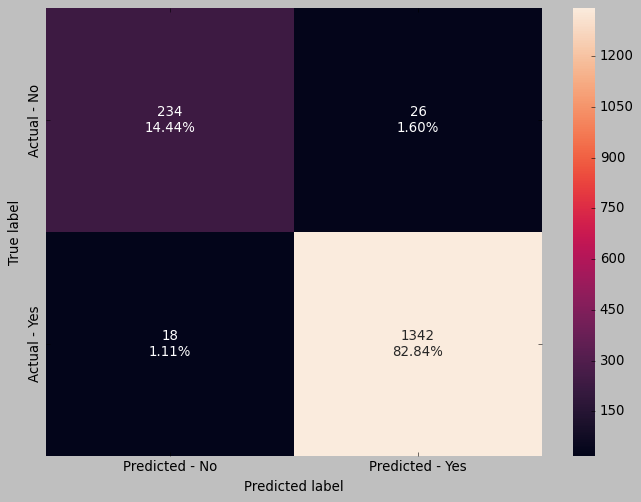

In [399]:
make_confusion_matrix_val(rand_obj_gbc_over,y_val)

The confusion matrix

 - True Positives (TP): We correctly predicted that 1348 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 132 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 128 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 12 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

__The Recall of the validation set have dropped which means the model is overfitting the data.__

## Comparing the tuned models

In [400]:
# defining list of models
models_tuning = [rand_obj_abc,rand_obj_gbc,rand_obj_gbc_over]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []


# looping through all the models to get the accuracy, precall and precision scores
for model in models_tuning:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_val.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_val.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_val.append(np.round(j[5],2))

In [401]:
comparison_frame_tuned = pd.DataFrame({'Model':[ 'AdaBoost Classifier', 
                                          'Gradient Boosting Classifier',
                                          'Gradient Boosting Classifier with Oversampling'], 
                                          'Train_Accuracy': acc_train,'Validation_Accuracy': acc_val,
                                          'Train_Recall':recall_train,'Validation_Recall':recall_val,
                                          'Train_Precision':precision_train,'Validation_Precision':precision_val}) 
comparison_frame_tuned

,Model,Train_Accuracy,Validation_Accuracy,Train_Recall,Validation_Recall,Train_Precision,Validation_Precision
0,AdaBoost Classifier,0.99,0.99,0.99,0.99,0.95,0.94
1,Gradient Boosting Classifier,0.99,0.99,0.99,0.99,0.92,0.91
2,Gradient Boosting Classifier with Oversampling,0.99,0.99,0.99,0.99,0.99,0.98


__Observations:__

 - All these models are giving same accuracy and recall.<br>
 - Since the overall performance of the Gradient Boosting Classifier was the same, let us consider this model with oversampled dataset as our final model and cross verify it on the test set.<br>

#### Predict the Performance on test set

In [402]:
model = rand_obj_gbc_over

# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model.predict(X_test)))

Recall on test set
0.9912023460410557

Precision on test set
0.9854227405247813

Accuracy on test set
0.9802955665024631


The Recall of the test set is the same as that of the validation set. So the model is not overfitting the data.

## Pipeline

Let us create a pipeline which does the following:<br>

 - Scaling using Standard Scalar,<br>
 - Oversampling the train data using SMOTE.<br>
 - Run Gradient Boosting Classifier on this oversampled data.<br>
 - Perform hyperparameter tuning using Randomised Search.

In [403]:
# defining pipe using make_pipeline
pipe = make_pipeline(StandardScaler(),SMOTE(), GradientBoostingClassifier()) 

In [404]:
pipe.steps

[('standardscaler', StandardScaler()),
 ('smote', SMOTE()),
 ('gradientboostingclassifier', GradientBoostingClassifier())]

In [405]:
parameters = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
             }

pipe =  RandomizedSearchCV(pipe, parameters,n_iter=30, scoring='recall',cv=5, random_state = 1, 
                                  n_jobs = -1, verbose = 2)

In [406]:
pipe.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('smote', SMOTE()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'gradientboostingclassifier__max_features': [0.7,
                                                                                     0.8,
                                                                                     0.9,
                                                                                     1],
                                        'gradientboostingclassifier__n_estimators': [100,
                                                                                     150,
                                                                                     200,
                                                                                     250],
                                        'gradientboostingclassifier__subsample': [0.8,
                                                                                  0.9,
                                                                                  1]},
                   random_state=1, scoring='recall', verbose=2)

In [407]:
# Accuracy of the final model on train set
pipe.score(X_train, y_train)

0.9894102073834388

In [408]:
# Accuracy of the final model on validation set
pipe.score(X_val, y_val)

0.9852941176470589

In [409]:
# Accuracy of the final model on test set
pipe.score(X_test, y_test)

0.9853372434017595

The Score is almost the same for the train, validation and test set which indicates that our model is not overfitting the data.

## Insights:

 - Most of the customers who are using the credit card services are female.<br>
 - Irrespective of the education background, everyone uses credit cards. But major users are graduates.<br>
 - Most of the married individuals use the credit cards.<br>
 - People with all the income backgrounds use the card. But major customers have an income of less than 40k dollars.<br>
 - Among the different types of cards available, Blue cards are widely used among the customers. There are very few customers who use silver or platinum cards.<br>

__Logistic Regression:__

 - The Recall of training set and validation set using logistic regression with original dataset seems to be close.<br>
 - The Recall after applying oversampling reduces when compared with the original dataset. But it is same for both train and validation set.<br>
 - After applying undersampling the recall has reduced drastically. This can be due to loss of information while undersampling.<br>
 
__Decision Tree:__
 
  - There is a slight difference in recall of train and validation set, the data might be overfitting.<br>
  - On oversampling the recall of validation set have further reduced.<br>
  - After undersampling the recall for both train and validation set have reduced.<br>
  
__Bagging CLassifier:__

 - There is a slight difference in recall of train and validation set, the data might be overfitting.<br>
 - On oversampling the recall of validation set have further reduced.<br>
 - After undersampling the recall for both train and validation set have reduced.<br>

__Random Forest Classifier:__

 - There is a very small difference in recall of train and validation set. The algorithm seems to be working perfectly for train set.<br>
 - The recall remains the same on oversampling.<br>
 - There is a reduction of recall for both train and validation set on undersampling.<br>

__AdaBoost Classifier:__

 - The Recall of both the train and validation set is the same. The model seems to be working well on the dataset.<<br>
 - There is no changes after oversampling.<br>
 - There is a reduction in the recall of both train set and validation set. There is a slight reduction in validation set compared to train set.<br>

__Gradient Boosting Classifier:__

 - The Recall of this model with the original dataset seems to be the highest when compared to all the other models.<br>
 - The Recall is same after oversampling.<br>
 - The Recall after undersampling has reduced a bit but still performing well on both train and validation set.<br>

__After Performing Hyperparameter tuning on AdaBoost Classifier on original dataset, Gradient Boosting Classifier on original dataset and Gradient Boosting classifier with oversampling__:

- All these models gave the same accuracy and recall.<br>
- Since the overall performance of the Gradient Boosting Classifier was the same, we have considered Gradient Boosting Classifier with oversampling as our final model.<br>
- The performance of the final model on the test set showed that the model was not overfitting the data. Hence this model was finalized and a pipeline was bulit.<br>
 
From the final pipeline we go the model score of 98% for all the tree sets, Train set, validation set and test set.

## Recommendations

 - As we observed, major customers using credit cards were female. The company have to come up with a strategy to encourage males to use the cards as well.<br>
 - We have seen that major customers were using blue cards. There are gold, silver and platinum cards as well which are rarely used. Benefits of using these cards must be conveyed to the customers so that more and more people start using the higher end cards.<br>
 - Advertising of benefits and offers available on using the credit cards have to be done, which might attract few customers.<br>
